In [1]:
import pandas as pd

df = pd.read_csv('kursovaya.csv') 

df

,Date,Name,Text
0,2022-02-25,Стенограмма заседания парламента (2022.02.25),The invasion of the Russian army into Ukrainia...
1,2022-02-25,Стенограмма заседания парламента (2022.02.25),working closely with the international communi...
2,2022-02-25,Стенограмма заседания парламента (2022.02.25),"As for Russia, we have developed diplomacy to ..."
3,2022-02-25,Стенограмма заседания парламента (2022.02.25),I hope that the day will come soon when Russia...
4,2022-03-04,Стенограмма заседания парламента (2022.03.04),I feel that the structure of the big world is ...
...,...,...,...
482,2022-09-30,Kishida Fumio Twitter,"Japan strongly condemns Russia's\n""incorporati..."
483,2022-09-30,Kishida Fumio Twitter,Japan cannot condone any attempts to unilatera...
484,2022-09-30,Kishida Fumio Twitter,"We strongly condemn Russia's ""annexation"" of p..."
485,2022-11-17,Kishida Fumio Twitter,"Furthermore, at the G7/NATO emergency summit c..."


In [2]:
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
early_df = df[df['Date'] <= '2022-04-30']
mid_df = df[(df['Date'] >= '2022-05-01') & (df['Date'] <= '2022-08-31')]
late_df = df[df['Date'] >= '2022-09-01']

In [35]:
def generate_wordcloud(text_data, title, custom_stopwords=None):
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    stop_words = set(stopwords.words('english'))

    if custom_stopwords:
        stop_words.update(custom_stopwords)
    
    tokens = word_tokenize(" ".join(text_data).lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    cleaned_text = " ".join(tokens)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

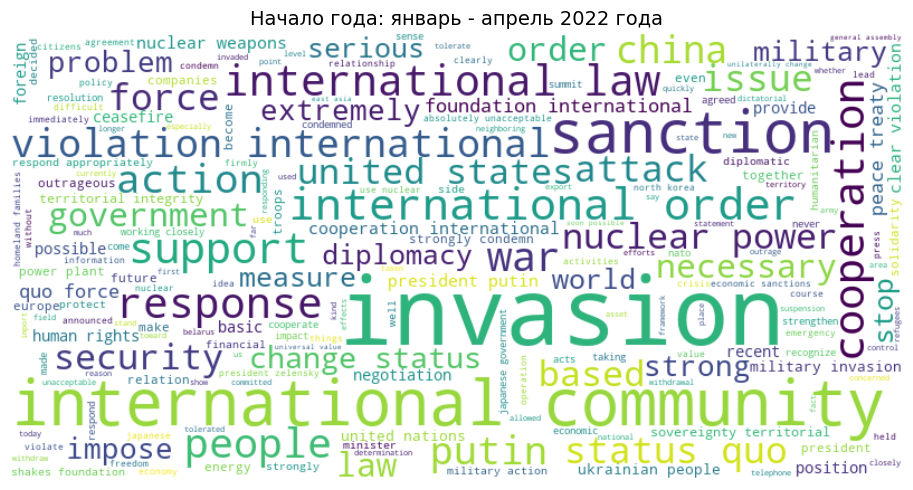

In [54]:
early_stopwords = ['russian', 'aggression', 'also', 'russia', 'japan', 'countries', 'regarding', 'must', 'country', 'think', 
                  'time', 'believe', 'continue', 'said', 'thing', 'take', 'many', 'various', 'including', 'situation', 'important', 
                  'work', 'ukraine', 'already', 'act', 'way', 'current']
generate_wordcloud(early_df['Text'], 'Начало года: январь - апрель 2022 года', early_stopwords)

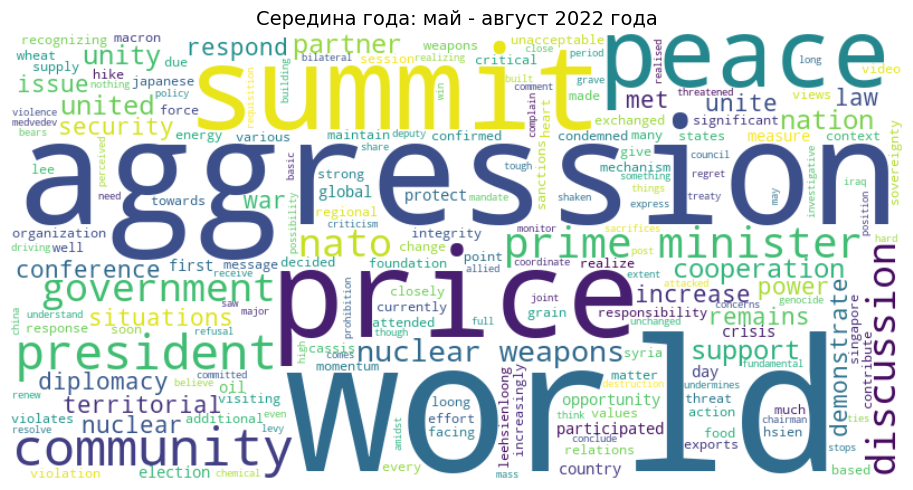

In [70]:
mid_stopwords = ['including', 'also', 'japan', 'russia', 'toward', 'agression ukraine', 'ukraine', 'situation', 'international', 
                'agreed', 'work', 'agreed', 'must', 'one', 'countries', 'certain', 'take', 'free', 'republics', 'totally', 
                'open', 'russian', 'time', 'invasion', 'order', 'possible', 'use', 'together', 'said', 'important', 
                'frank', 'future', 'held', 'considers', 'continue', 'part', 'act', 'taking', 'state', 'new', 'sense']
generate_wordcloud(mid_df['Text'], 'Середина года: май - август 2022 года', mid_stopwords)

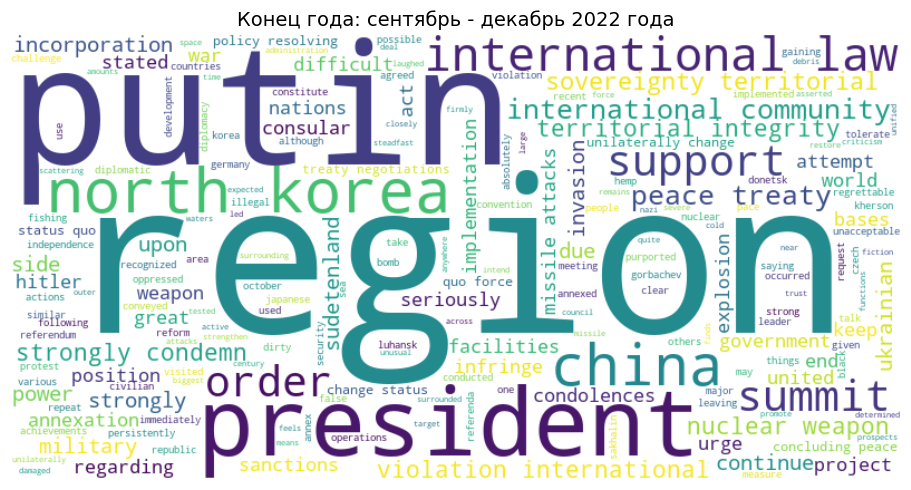

In [73]:
late_stopwords = ['also', 'including', 'russia', 'ukraine', 'japan', 'russian', 'never', 'believe', 'state', 'ukranian', 
                 'part', 'four', 'issue', 'work', 'situation', 'aggression', 'parts', 'extremely', 'ukranian', 'relations', 
                  'tolerated', 'think', 'extremely', 'aware', 'must', 'accepted', 'current', 'september', 'held', 'states', 'three']
generate_wordcloud(late_df['Text'], 'Конец года: сентябрь - декабрь 2022 года', late_stopwords)